# Goodreads Books Reviews
### Authors: Tilova, Calvin, Clement

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#scikit learn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [3]:
df_train = pd.read_csv('../data/goodreads_train.csv')

In [4]:
df_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [5]:
df_train.describe()

,book_id,rating,n_votes,n_comments
count,9.000000e+05,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294381,1.016656
std,9.357863e+06,1.252583,17.873553,5.963821
min,1.000000e+00,0.000000,-3.000000,-1.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344203e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


In [5]:
df_train.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [7]:
df_train.duplicated().sum()

0

In [3]:
# Count the number of occurrences of each user rating in the 'rating' column

rating_counts = df_train['rating'].value_counts()

print(rating_counts)

rating
4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: count, dtype: int64


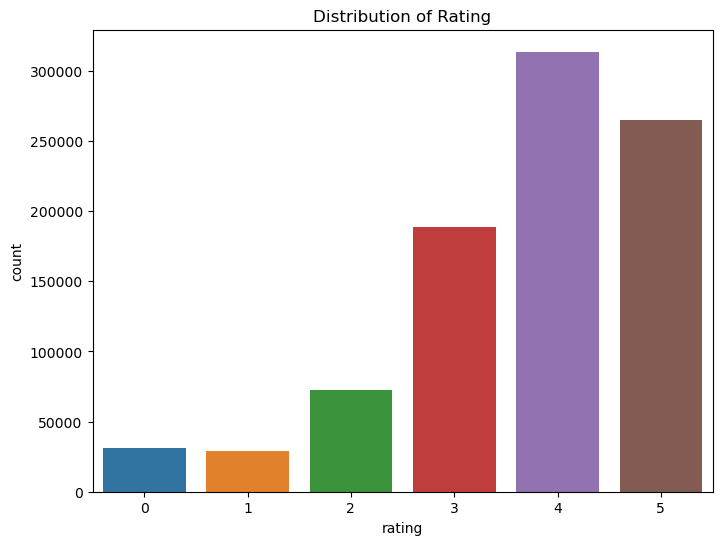

In [11]:
# Visualize the distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_train)
plt.title('Distribution of Rating')
plt.show()

### Visualize Feature Relationships

/Users/tilovashahrin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


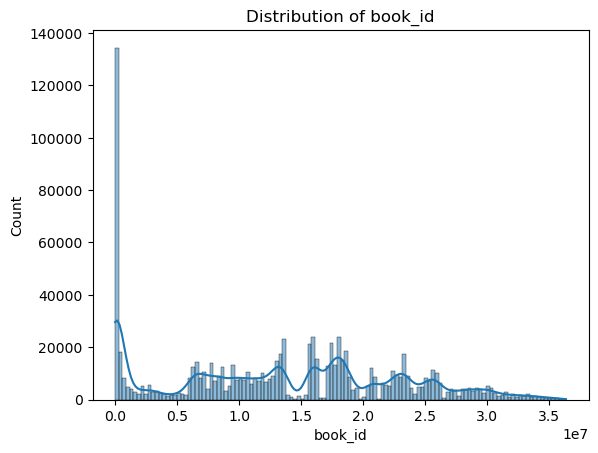

/Users/tilovashahrin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


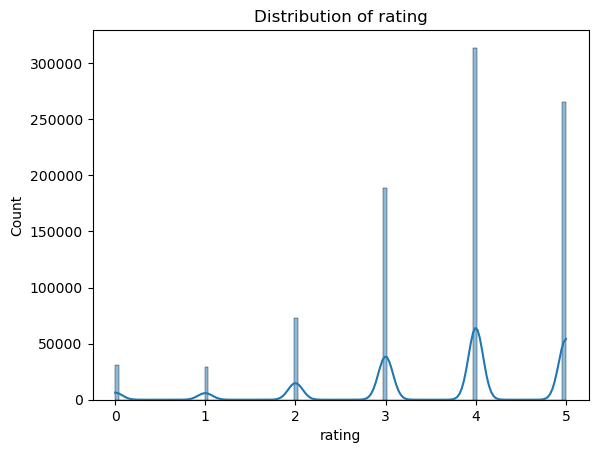

/Users/tilovashahrin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


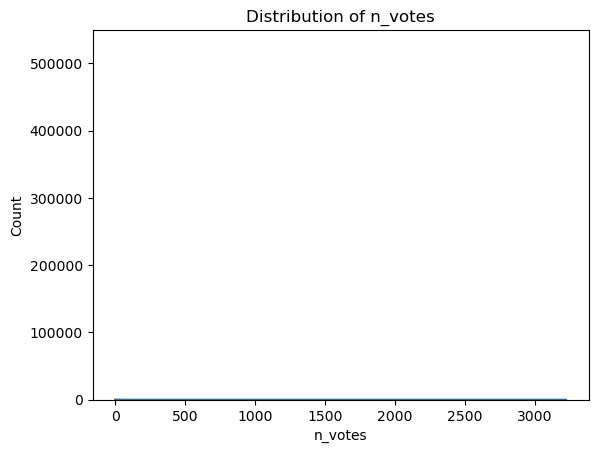

/Users/tilovashahrin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


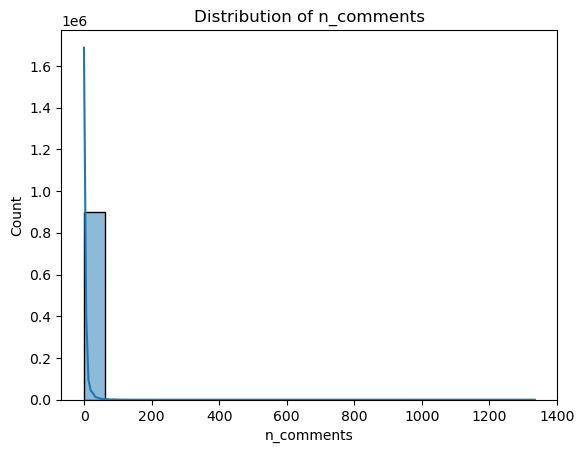

In [15]:
# Visualize the distribution of numerical features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure()
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

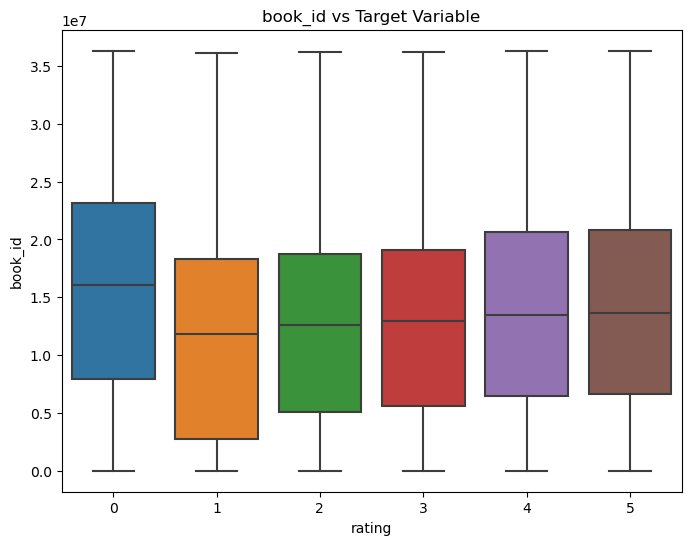

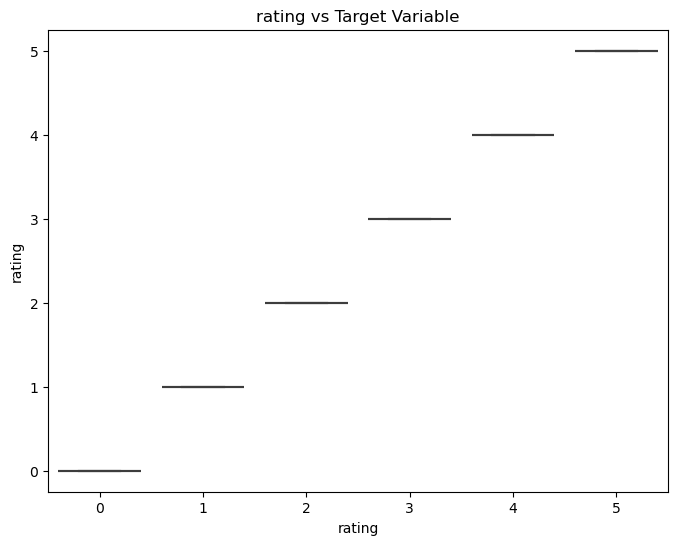

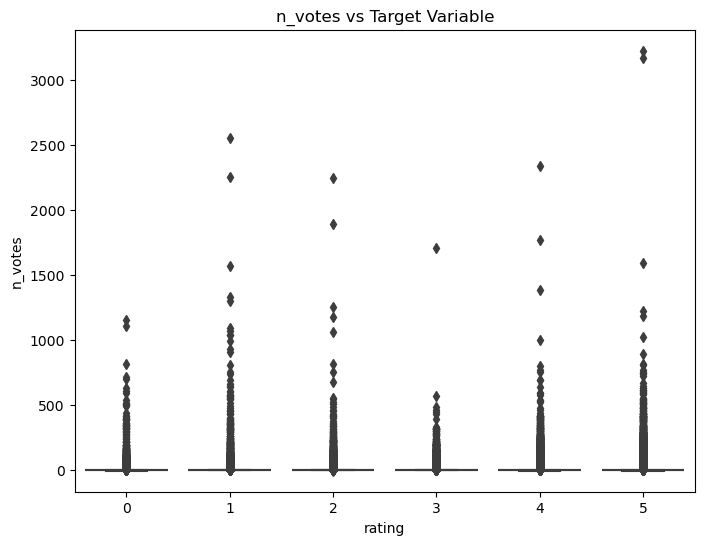

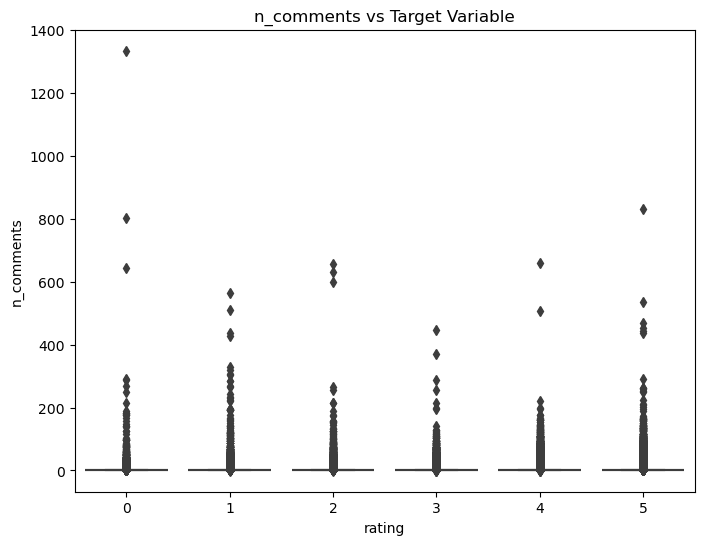

In [17]:
# Visualize the relationship between numerical features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='rating', y=feature, data=df_train)
    plt.title(f'{feature} vs Target Variable')
    plt.show()

In [19]:
df_train.n_comments.describe()

count    900000.000000
mean          1.016656
std           5.963821
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1335.000000
Name: n_comments, dtype: float64

In [21]:
df_train.n_votes.describe()

count    900000.000000
mean          3.294381
std          17.873553
min          -3.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        3222.000000
Name: n_votes, dtype: float64

We can conclude that there is no correlation or relationship between rating and other categorical features, we can go ahead and drop them.

In [18]:
df_train.drop(["user_id", "book_id", "review_id", "date_added", "date_updated", "read_at", "started_at"], axis =1, inplace=True)

### Text preprocessing